<a href="https://colab.research.google.com/github/Tuevu110405/Module4-Linear_regression/blob/feature%2Fgentic_algorithm/Genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
    data = np.genfromtxt(fileName, dtype = None, delimiter = ',', skip_header = 1)
    features_X = data[:,:3]
    sales_Y = data[:, 3]
    features_X = np.hstack((np.ones((features_X.shape[0], 1)), features_X))
    return features_X, sales_Y

In [4]:
features_X, sales_Y = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [5]:
print(sales_Y.shape)

(200,)


In [6]:
def create_individual(n = 4, bound = 10):
    individual = []
    for i in range(n):
        individual.append(random.random())
    individual = np.array(individual)
    return individual

In [7]:
features_X, sales_Y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.mean((sales_Y - y_hat)**2)
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    return 1/(loss+ 1)

In [8]:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [9]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    return individual1_new, individual2_new

In [10]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover ( individual1 , individual2 , 2.0)
print (" individual1 : " , individual1 )
print (" individual2 : " , individual2 )

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


In [11]:
def mutate(individual,mutation_rate = 0.05):
    individual_m = individual.copy()
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = random.random()
    return individual_m

before_individual = [4.09 , 4.82 , 3.10 , 4.02]
after_individual = mutate(individual, mutation_rate= 2.0)
print(before_individual == after_individual)

False


In [12]:
def initializePopulation(m):
    population = [create_individual() for i in range(m)]
    return population

In [13]:
def selection(sorted_old_population, m = 100):
    index1 = random.randint(0, m - 1)
    while True:
        index2 = random.randint(0, m - 1)
        if (index1 != index2):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    return individual_s

In [14]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen %1 == 0:
        print (" Best loss :" , compute_loss ( sorted_population [m -1]) , " with chromsome : " ,
    sorted_population [m -1])

    new_population = []
    while len(new_population) < m-elitism:
        #selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population)

        #crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)

        #mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)

    # copy elitism chromosome that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:m]:
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m-1])



In [15]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

 Best loss : 123415.051528805  with chromsome :  [3.44, 2.57, -0.79, -2.41]


In [16]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_list = []
    for i in range(n_generations):
        population, loss = create_new_population(population, elitism=2, gen=i)
        losses_list.append(loss)
    return losses_list


 Best loss : 14.710797243762473  with chromsome :  [0.12932444 0.05416449 0.19951687 0.11632412]
 Best loss : 14.710797243762473  with chromsome :  [0.12932444 0.05416449 0.19951687 0.11632412]
 Best loss : 14.710797243762473  with chromsome :  [0.12932444 0.05416449 0.19951687 0.11632412]
 Best loss : 14.710797243762473  with chromsome :  [0.12932444 0.05416449 0.19951687 0.11632412]
 Best loss : 14.710797243762473  with chromsome :  [0.12932444 0.05416449 0.19951687 0.11632412]
 Best loss : 14.710797243762473  with chromsome :  [0.12932444 0.05416449 0.19951687 0.11632412]
 Best loss : 14.710797243762473  with chromsome :  [0.12932444 0.05416449 0.19951687 0.11632412]
 Best loss : 14.710797243762473  with chromsome :  [0.12932444 0.05416449 0.19951687 0.11632412]
 Best loss : 14.710797243762473  with chromsome :  [0.12932444 0.05416449 0.19951687 0.11632412]
 Best loss : 14.710797243762473  with chromsome :  [0.12932444 0.05416449 0.19951687 0.11632412]
 Best loss : 14.71079724376247

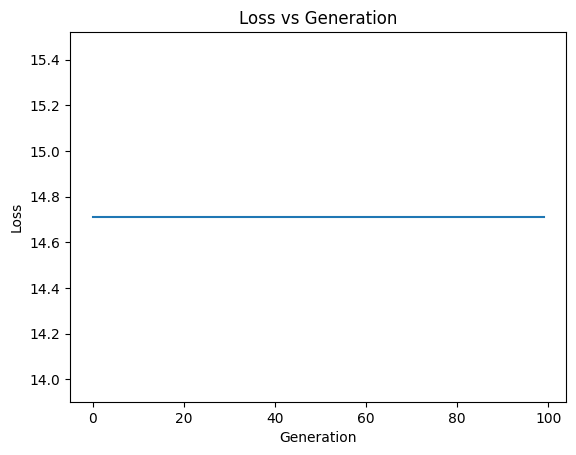

In [19]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    plt.plot(losses_list)
    plt.xlabel("Generation")
    plt.ylabel("Loss")
    plt.title("Loss vs Generation")
    plt.show()

losses_list = run_GA()
visualize_loss(losses_list)

[3.44, 2.57, -0.79, -2.41]


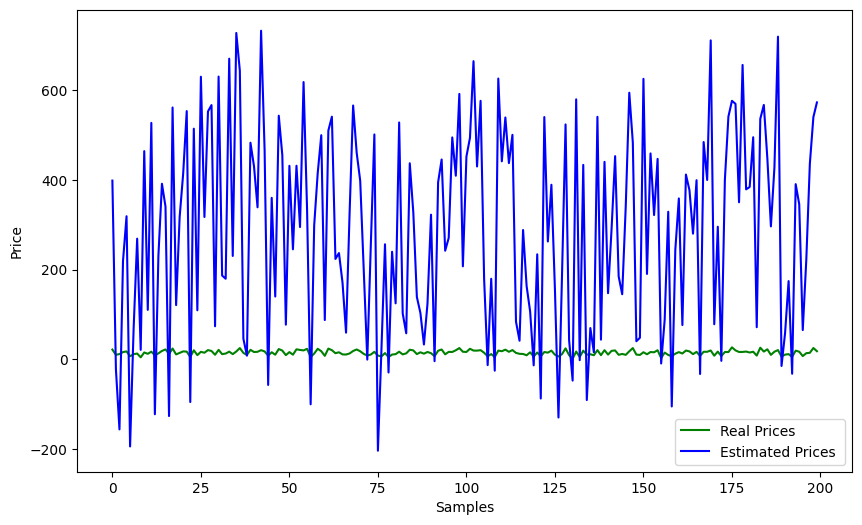

In [20]:
#visualizing comparing predicted value with real value
def visualize_predict_gt():
    sorted_population = sorted(new_population , key=compute_fitness)
    print (sorted_population[-1])
    theta = np.array (sorted_population[-1])

    estimated_prices = []
    for feature in features_X:
        estimated_price = sum(c * x for c, x in zip(feature, theta))
        estimated_prices.append(estimated_price)


    fig , ax = plt.subplots ( figsize =(10 , 6) )
    plt.xlabel ( 'Samples' )
    plt.ylabel ( 'Price')
    plt.plot ( sales_Y , c = 'green' , label = 'Real Prices')
    plt.plot ( estimated_prices , c = 'blue' , label ='Estimated Prices ')
    plt.legend()
    plt.show()


visualize_predict_gt()


